# **Exploratory Data Analysis of Players Dataframe**

### **We will be analysing the Players dataset**

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Reading the excel file
players_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/3. IPL/2. Players Dataset/Players.xlsx')

# **Step 1: Skimming over the Dataset and Analysing the Data**

### **In this step we will be analysing the dataset**

In [51]:
# Shape of the dataset
players_df.shape

(566, 5)

In [52]:
# Columns of the dataset
players_df.columns

Index(['Player_Name', 'DOB', 'Batting_Hand', 'Bowling_Skill', 'Country'], dtype='object')

In [53]:
# Info of the dataset
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [54]:
# Overview of the dataset
players_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,563,502,471
unique,566,457,3,16,11
top,KC Sangakkara,1987-04-30 00:00:00,Right_Hand,Right-arm medium,India
freq,1,3,373,107,264
first,NaN,1969-06-30 00:00:00,NaN,NaN,NaN
last,NaN,1998-07-18 00:00:00,NaN,NaN,NaN


# **Step 2: Analysing our deliveries dataset**

### **In this step we will be analysing the dataset**

In [55]:
# Print the dataset
players_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


# **Objective - Players Dataset**
**1. After India, from which country players belongs?**

**2. Left Hand Bolwing vs Right Hand Bowling Ratio**

**3. Highest number of Bowling Skill type**

**4. List of top 10 oldest players and younger players**

**5. Final Conclusion of Players Dataframe**

## **Task-1 After India, from which country players belongs?**

### **Let us check after India, from which country players belongs?**

In [56]:
# Make a copy of players_df - country column
players_country_df = players_df[['Country']]

In [57]:
# Drop the rows with nan values
players_country_df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
# Reset the index of no nan values df
players_country_df = players_country_df.reset_index()

In [59]:
# Groupby countries and count the players
players_country_df = players_country_df.groupby('Country')[['index']].count()

In [60]:
players_country_df

,index
Country,
Australia,72
Bangladesh,5
England,14
India,264
Netherlands,1
New Zealand,22
Pakistan,13
South Africa,39
Sri Lanka,20


In [61]:
# Rename the index column and sort values according to number of players of each country in ipl
players_country_df.rename(columns = {'index' : 'number_of_players'}, inplace = True)
players_country_df.sort_values(by = 'number_of_players', ascending = False, inplace = True)
players_country_df = players_country_df.reset_index()

In [62]:
# Print the players country df
players_country_df

,Country,number_of_players
0,India,264
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


In [63]:
# We can see that after India, most number of players in ipl are from Australia

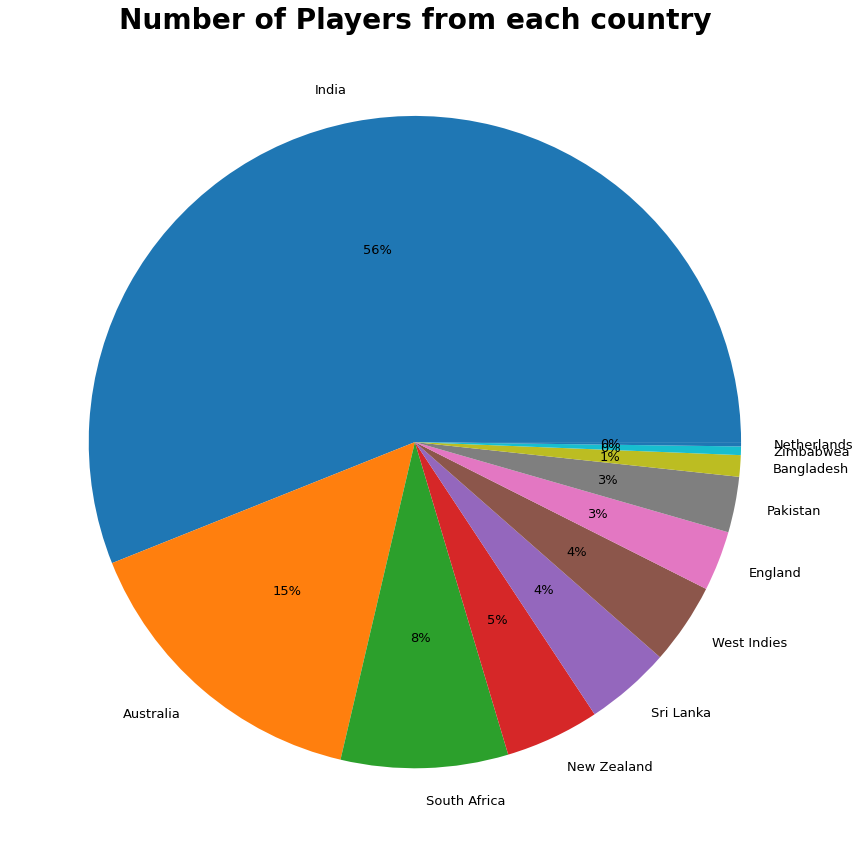

In [64]:
# Let us plot the graph for better understanding
labels = list(players_country_df['Country'])
plt.figure(figsize = (15, 15))

plt.title("Number of Players from each country", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)

plt.pie(players_country_df['number_of_players'], labels = labels, autopct='%1.0f%%', textprops = {'fontsize' : 13});

In [65]:
# Let's plot pie chart again without India
labels = list(players_country_df['Country'])
labels.remove('India')

In [66]:
players_country_df.drop([0], inplace = True)

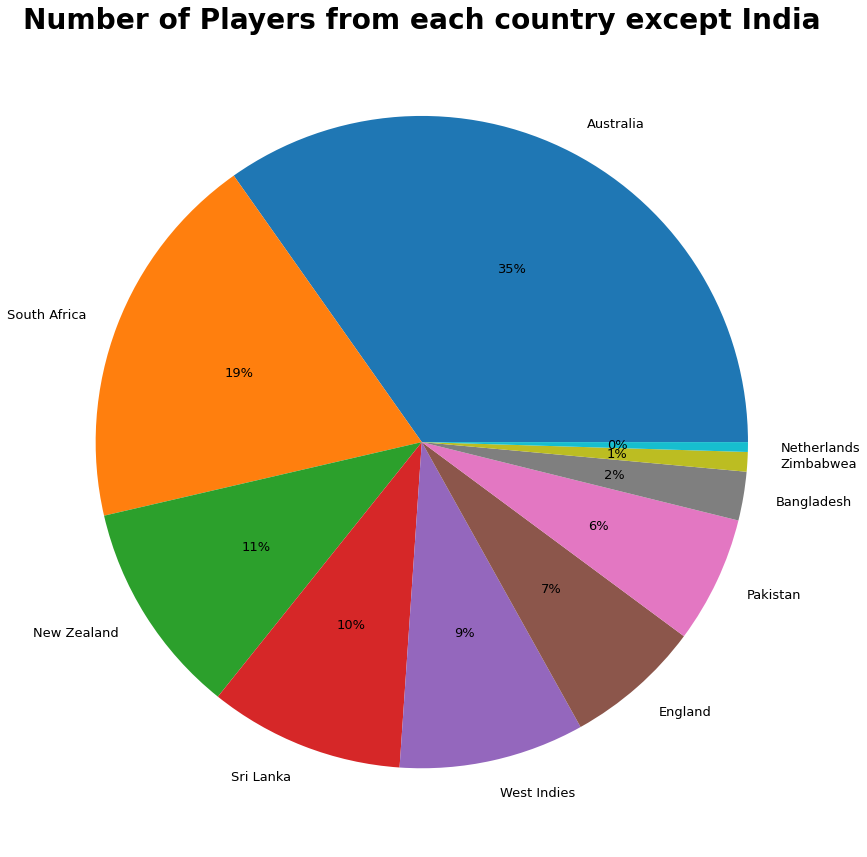

In [67]:
plt.figure(figsize = (15, 15))

plt.title("Number of Players from each country except India", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)

plt.pie(players_country_df['number_of_players'], labels = labels, autopct='%1.0f%%', textprops = {'fontsize' : 13});

## **Conclusion**

**Most number of players in ipl are from India - 264 players**

**Most number of players in ipl apart from India are from Australia - 72 players which is 35% - followed by the South Africa - 39 players which is 19%**

## **Task-2 Left Hand Bolwing vs Right Hand Bowling Ratio**

### **Let us know Left Hand Bolwing vs Right Hand Bowling Ratio**

In [68]:
# Make a copy of players_df - batting hand column
players_batting_hand_df = players_df[['Batting_Hand']]

In [69]:
# Drop the rows with nan values
players_batting_hand_df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
# Reset the index of no nan values df
players_batting_hand_df = players_batting_hand_df.reset_index()

In [71]:
players_batting_hand_df

,index,Batting_Hand
0,0,Right_Hand
1,1,Right_Hand
2,2,Right_Hand
3,3,Right_hand
4,4,Right_Hand
...,...,...
558,561,Right_Hand
559,562,Right_Hand
560,563,Left_Hand
561,564,Right_Hand


In [72]:
# Groupby batting hand and count the number of players
players_batting_hand_df = players_batting_hand_df.groupby('Batting_Hand')[['index']].count()

In [73]:
players_batting_hand_df

,index
Batting_Hand,
Left_Hand,142
Right_Hand,373
Right_hand,48


In [74]:
# As we can see there are two Right_Hand values so let's add them and make them one
players_batting_hand_df['index'][1] = players_batting_hand_df['index'][1] + players_batting_hand_df['index'][2]

In [75]:
# Drop last row
players_batting_hand_df.drop(['Right_hand'], inplace = True)

In [76]:
players_batting_hand_df

,index
Batting_Hand,
Left_Hand,142
Right_Hand,421


In [77]:
# Rename the index column and sort values according to number of players
players_batting_hand_df.rename(columns = {'index' : 'number_of_players'}, inplace = True)
players_batting_hand_df.sort_values(by = 'number_of_players', ascending = False, inplace = True)
players_batting_hand_df = players_batting_hand_df.reset_index()

In [78]:
players_batting_hand_df

,Batting_Hand,number_of_players
0,Right_Hand,421
1,Left_Hand,142


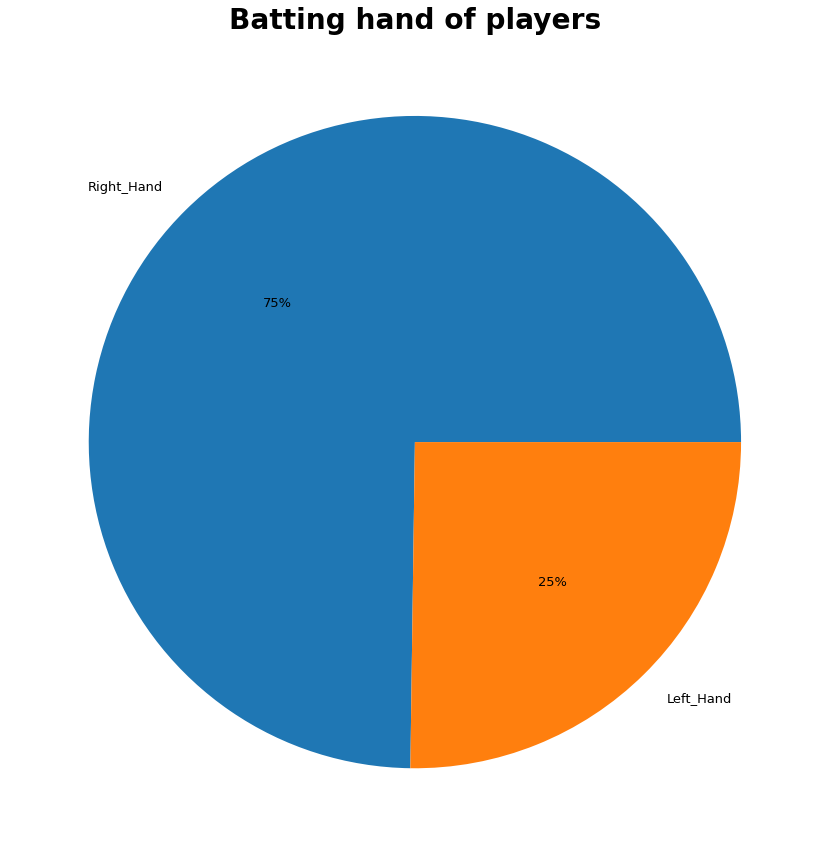

In [79]:
# Let us plot the graph for better understanding
labels = list(players_batting_hand_df['Batting_Hand'])
plt.figure(figsize = (15, 15))

plt.title("Batting hand of players", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)

plt.pie(players_batting_hand_df['number_of_players'], labels = labels, autopct='%1.0f%%', textprops = {'fontsize' : 13});

## **Conclusion**

**Most number of players in ipl are Right Hand Batsmen - 421 which is 75%, and Left Hand Batsmen - 142 which is 25% in total**

## **Task-3 Highest number of Bowling Skill type**

### **Let us get highest number of Bowling Skill type**

In [80]:
# Make a copy of players_df - bowling skills column
players_bowling_df = players_df[['Bowling_Skill']]

In [81]:
# Drop the rows with nan values
players_bowling_df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
# Reset the index of no nan values df
players_bowling_df = players_bowling_df.reset_index()

In [83]:
# Groupby bowling skill and count the number of players
players_bowling_df = players_bowling_df.groupby('Bowling_Skill')[['index']].count()

In [84]:
players_bowling_df

,index
Bowling_Skill,
Left-arm fast,4
Left-arm fast-medium,19
Left-arm medium,11
Left-arm medium-fast,9
Legbreak,30
Legbreak googly,28
Right-arm Fast,1
Right-arm Medium,1
Right-arm bowler,1


In [85]:
# Rename the index column and sort values according to number of players
players_bowling_df.rename(columns = {'index' : 'number_of_players'}, inplace = True)
players_bowling_df.sort_values(by = 'number_of_players', ascending = False, inplace = True)
players_bowling_df = players_bowling_df.reset_index()

In [86]:
players_bowling_df

,Bowling_Skill,number_of_players
0,Right-arm medium,107
1,Right-arm offbreak,91
2,Right-arm fast-medium,68
3,Slow left-arm orthodox,50
4,Right-arm fast,39
5,Right-arm medium-fast,38
6,Legbreak,30
7,Legbreak googly,28
8,Left-arm fast-medium,19
9,Left-arm medium,11


In [87]:
# Let us update the Right Arm medium bowlers
players_bowling_df['number_of_players'][0] = players_bowling_df['number_of_players'][0] + players_bowling_df['number_of_players'][14]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
# Drop extra Rgith Arm Medium bowlers
players_bowling_df.drop(14, inplace = True)

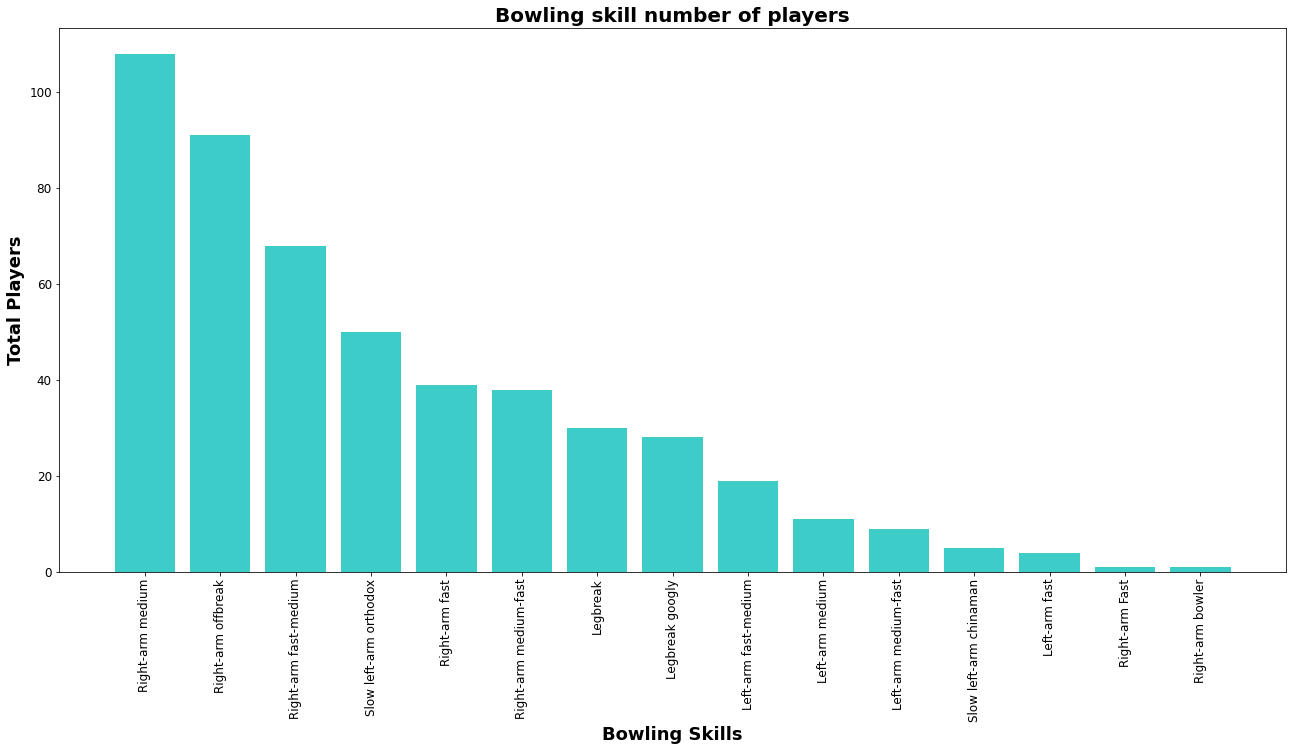

In [89]:
# Plot the bar graph for players bowling dataset
plt.figure(figsize = (22, 10))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 12)

plt.xlabel('Bowling Skills', fontweight = 'bold', fontsize = 18)
plt.ylabel('Total Players', fontweight = 'bold', fontsize = 18)
plt.title('Bowling skill number of players', fontweight = 'bold', fontsize = 20);

plt.bar(players_bowling_df['Bowling_Skill'], players_bowling_df['number_of_players'], color = ['#3DCCC7']);

## **Conclusion**

**Most number of players in ipl are Right arm medium bowlers - 108 players, followed by the right arm offbreak - 91 players**

## **Task-4 List of top 5 oldest players and youngest players by age**

### **List of top 5 oldest players and younger players by age**

In [90]:
# Make a copy of players_df - bowling skills column
players_age_df = players_df[['Player_Name', 'DOB']]

In [91]:
# Drop the rows with nan values
players_age_df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# Reset the index of no nan values df
players_age_df = players_age_df.reset_index()
players_age_df.drop(columns = ['index'], inplace = True)

In [93]:
players_age_df

,Player_Name,DOB
0,A Ashish Reddy,1991-02-24
1,A Chandila,1983-12-05
2,A Chopra,1977-09-19
3,A Flintoff,1977-12-06
4,A Kumble,1970-10-17
...,...,...
466,Younis Khan,1977-11-29
467,YS Chahal,1990-07-23
468,Yuvraj Singh,1981-12-12
469,YV Takawale,1984-11-05


In [94]:
# Let's get the oldest player in ipl
sorted_value_object = players_age_df.sort_values(by = 'DOB', ascending = True)

In [95]:
sorted_value_object

,Player_Name,DOB
414,ST Jayasuriya,1969-06-30
393,SK Warne,1969-09-13
126,DS Lehmann,1970-02-05
140,GD McGrath,1970-02-09
377,SB Joshi,1970-06-06
...,...,...
272,Mustafizur Rahman,1995-09-06
358,S Kaushik,1995-09-07
337,RR Pant,1997-10-04
400,SN Khan,1997-10-27


## **Conclusion**

**Some of the oldest players by age of ipl are - St Jayasuriya, SK Warne, Ds Lehmann, GD McGrath, and SB Joshi**

**Some of the youngest players by age of ipl are - Ishan Kishan, SN Khan, RR Pant, S Kaushik, and Mustafizur Rahman**